# Netflix Movies & TV Shows Analysis

This notebook analyzes the Netflix dataset using Python and data visualization techniques.

In [ ]:
%run visualizations.py

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from collections import Counter

sns.set(style="darkgrid")

## Loading the Dataset

We load the Netflix dataset and inspect its structure.

In [2]:
df = pd.read_csv("netflix_cleaned.csv")
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added,duration_numeric
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown Cast,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,September,90.0
1,s2,TV Show,Blood & Water,Unknown Director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,September,NaN
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown Country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,September,NaN
3,s4,TV Show,Jailbirds New Orleans,Unknown Director,Unknown Cast,Unknown Country,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021,September,NaN
4,s5,TV Show,Kota Factory,Unknown Director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021,September,NaN


## Data Inspection (Cleaned Data)

The cleaned dataset generated by the data cleaning pipeline is inspected here.

In [3]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8793 entries, 0 to 8792
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   show_id           8793 non-null   object 
 1   type              8793 non-null   object 
 2   title             8793 non-null   object 
 3   director          8793 non-null   object 
 4   cast              8793 non-null   object 
 5   country           8793 non-null   object 
 6   date_added        8793 non-null   object 
 7   release_year      8793 non-null   int64  
 8   rating            8793 non-null   object 
 9   duration          8790 non-null   object 
 10  listed_in         8793 non-null   object 
 11  description       8793 non-null   object 
 12  year_added        8793 non-null   int64  
 13  month_added       8793 non-null   object 
 14  duration_numeric  6126 non-null   float64
dtypes: float64(1), int64(2), object(12)
memory usage: 1.0+ MB


## Movies vs TV Shows

This section compares the number of movies and TV shows on Netflix.

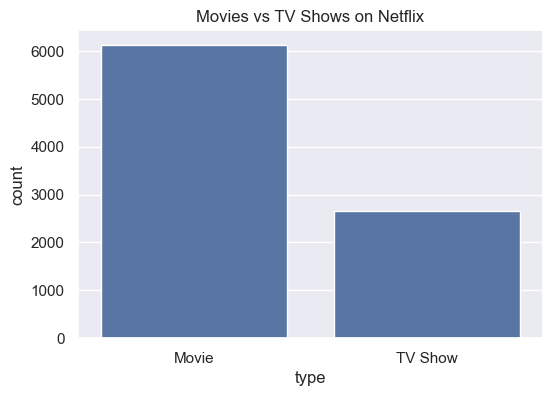

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='type')
plt.title("Movies vs TV Shows on Netflix")
plt.show()

In [ ]:
print("=== ADVANCED ANALYSIS: Outlier Detection ===\n")

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, y='release_year', color='skyblue')
plt.title("Release Year Distribution - Outlier Detection (Box Plot)")
plt.ylabel("Release Year")
plt.axhline(y=df['release_year'].quantile(0.25), color='red', linestyle='--', label='Q1')
plt.axhline(y=df['release_year'].quantile(0.75), color='green', linestyle='--', label='Q3')
plt.legend()
plt.show()

## Content Growth Over the Years

Netflix content has increased significantly in recent years.

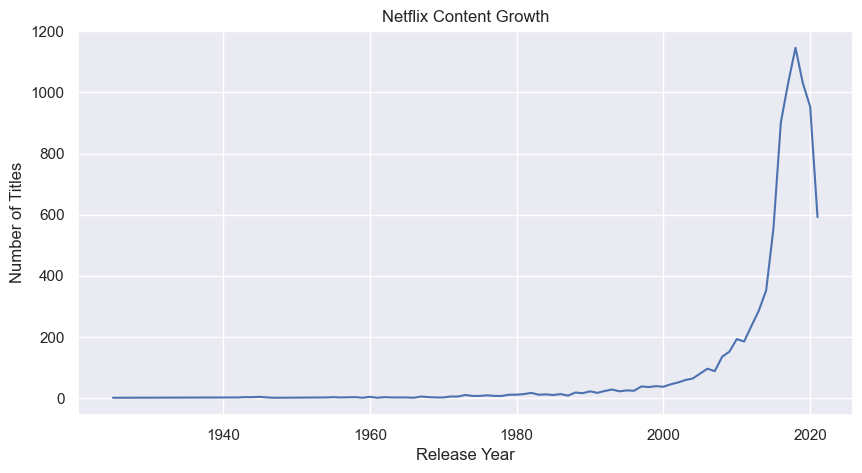

In [6]:
year_counts = df['release_year'].value_counts().sort_index()

plt.figure(figsize=(10,5))
year_counts.plot(kind='line')
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.title("Netflix Content Growth")
plt.show()

## Top Producing Countries

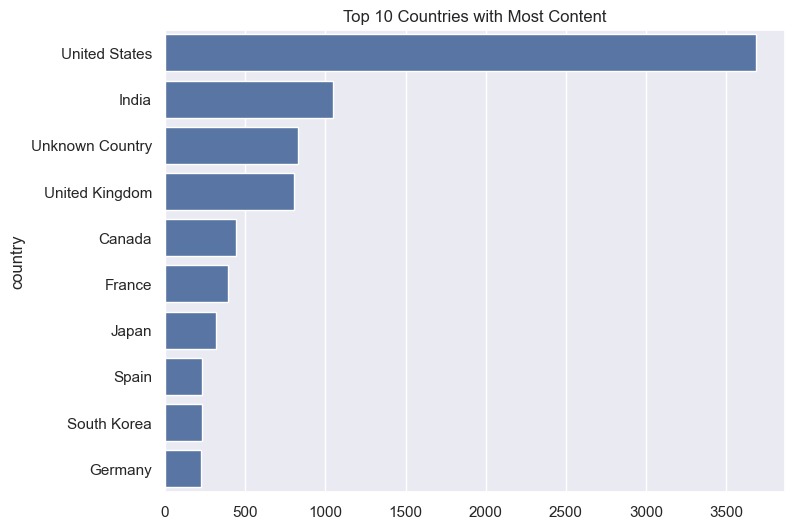

In [7]:
countries = df['country'].str.split(', ').explode()
top_countries = countries.value_counts().head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries with Most Content")
plt.show()

In [ ]:
all_countries = []
for countries in df['country'].dropna():
    if countries != "Unknown Country":
        all_countries.extend([c.strip() for c in countries.split(',')])

country_counts = Counter(all_countries)
country_series = pd.Series(dict(country_counts))

q1_country = country_series.quantile(0.25)
q3_country = country_series.quantile(0.75)
iqr_country = q3_country - q1_country
upper_bound_country = q3_country + 1.5 * iqr_country

plt.figure(figsize=(12, 8))
top_20_countries = country_series.nlargest(20)
colors_country = ['red' if x > upper_bound_country else 'lightgreen' 
                 for x in top_20_countries.values]
top_20_countries.plot(kind='barh', color=colors_country)
plt.title("Top 20 Countries - Anomaly Detection (IQR Method)")
plt.xlabel("Count")
plt.axvline(x=upper_bound_country, color='red', linestyle='--', label='Anomaly Threshold')
plt.legend()
plt.tight_layout()
plt.show()

## Genre Distribution

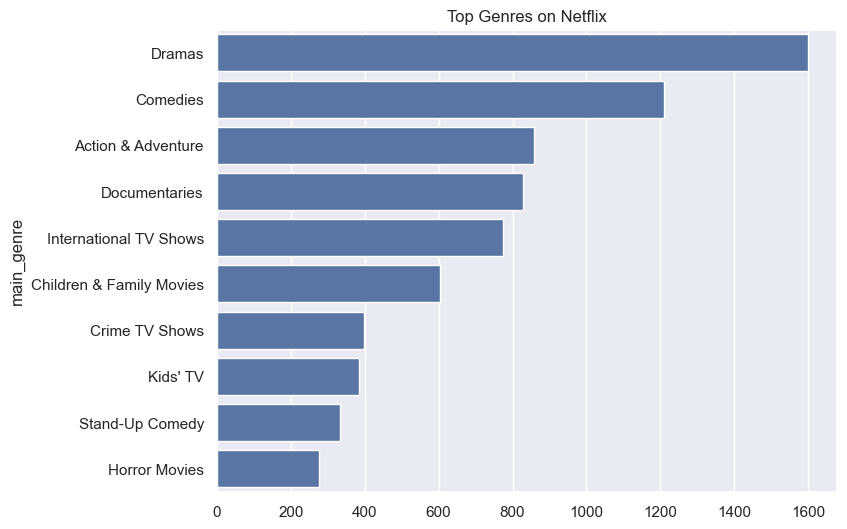

In [8]:
df['main_genre'] = df['listed_in'].str.split(',').str[0]
top_genres = df['main_genre'].value_counts().head(10)

plt.figure(figsize=(8,6))
sns.barplot(x=top_genres.values, y=top_genres.index)
plt.title("Top Genres on Netflix")
plt.show()

In [ ]:
# Genre Anomaly Detection
from collections import Counter

all_genres = []
for genres in df['listed_in'].dropna():
    all_genres.extend([g.strip() for g in genres.split(',')])

genre_counts = Counter(all_genres)
genre_series = pd.Series(dict(genre_counts))

q1_genre = genre_series.quantile(0.25)
q3_genre = genre_series.quantile(0.75)
iqr_genre = q3_genre - q1_genre
upper_bound_genre = q3_genre + 1.5 * iqr_genre

plt.figure(figsize=(12, 8))
colors_genre = ['red' if x > upper_bound_genre else 'lightblue' 
               for x in genre_series.values]
genre_series.sort_values().plot(kind='barh', color=colors_genre)
plt.title("Genre Distribution - Anomaly Detection (IQR Method)")
plt.xlabel("Count")
plt.axvline(x=upper_bound_genre, color='red', linestyle='--', label='Anomaly Threshold')
plt.legend()
plt.tight_layout()
plt.show()

## Rating Distribution

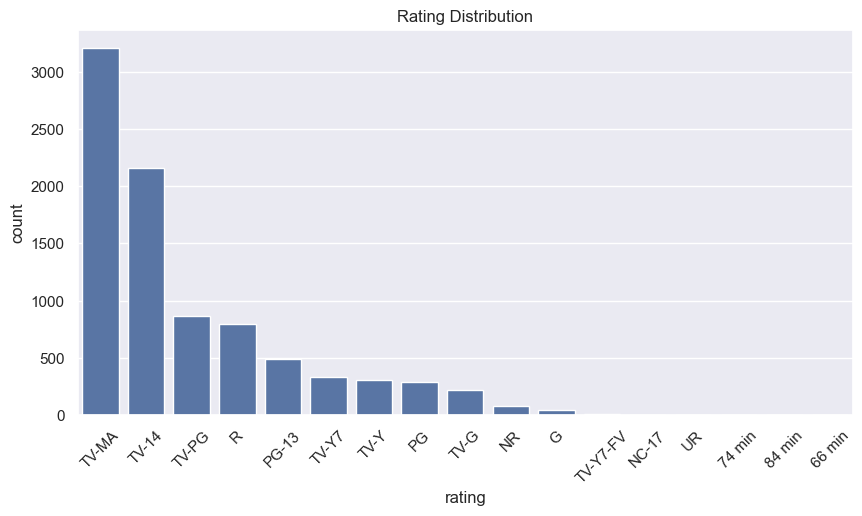

In [9]:
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='rating', order=df['rating'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Rating Distribution")
plt.show()

## Conclusion

Movies (69.2%) outnumber TV shows (30.8%) in Netflix’s catalog. The data show that Netflix content has increased rapidly since 2015, with Drama and Comedy genres becoming dominant. According to the country analysis, the USA is statistically overwhelmingly dominant in content production.